<a href="https://colab.research.google.com/github/BaghasWahyu/Cryptocurrency-Predicition-App/blob/main/Crypto_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# from google.colab import drive
# drive.flush_and_unmount()

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [31]:
crypto_name_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypro_symbol_list = []

In [32]:
df = pd.DataFrame()

In [33]:
def scrape(date):
  URL = 'https://coinmarketcap.com/historical/'+date
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, 'html.parser')
  tr = soup.find_all('tr', attrs={'class':'cmc-table-row'})
  count = 0
  for row in tr:
    if count == 10:
      break;
    count = count + 1
    name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
    crypto_name = name_column.find('a', attrs={'class':'cmc-table__column-name--name cmc-link'}).text.strip()
    coin_market_cap = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
    crypto_price = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
    crypto_circulating_supply_symbol = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
    crypto_circulating_supply = crypto_circulating_supply_symbol.split(' ')[0]
    crypto_symbol = crypto_circulating_supply_symbol.split(' ')[1]

    crypto_name_list.append(crypto_name)
    crypto_market_cap_list.append(coin_market_cap)
    crypto_price_list.append(crypto_price)
    crypto_circulating_supply_list.append(crypto_circulating_supply)
    crypro_symbol_list.append(crypto_symbol)

In [34]:
from datetime import datetime

tanggal = '2022-12-31' #@param {type:"date"}
tanggal = tanggal.replace("-","")


In [35]:
print(tanggal)

20221231


In [36]:
scrape(date = f'{tanggal}/')

In [37]:
df['Name'] =  crypto_name_list
df['Market Capitalization'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Symbol'] = crypro_symbol_list

In [38]:
df

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB
5,XRP,"$17,113,207,466.28",$0.3399,"50,343,500,506",XRP
6,Binance USD,"$16,695,767,093.61",$1.0002,"16,692,004,510",BUSD
7,Dogecoin,"$9,325,956,852.39",$0.07029,"132,670,764,300",DOGE
8,Cardano,"$8,505,385,897.18",$0.2465,"34,509,377,667",ADA
9,Polygon,"$6,625,126,687.82",$0.7585,"8,734,317,475",MATIC


In [39]:
list_crypto = df[:5]

In [40]:
list_crypto

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB


In [41]:
nama_crypto = list_crypto['Name']
symbol_crypto = list_crypto['Symbol']

In [42]:
nama_crypto

0     Bitcoin
1    Ethereum
2      Tether
3    USD Coin
4         BNB
Name: Name, dtype: object

In [43]:
symbol_crypto

0     BTC
1     ETH
2    USDT
3    USDC
4     BNB
Name: Symbol, dtype: object

In [44]:
print(type(symbol_crypto))

<class 'pandas.core.series.Series'>


In [45]:
symbolCrypto = []

for i in symbol_crypto:
  symbolCrypto.append(i)

In [46]:
symbolCrypto

['BTC', 'ETH', 'USDT', 'USDC', 'BNB']

In [47]:
!pip install cryptocmd

In [48]:
from datetime import datetime

startdate = "2019-01-01" #@param {type:"date"}
startdate = datetime.strptime(startdate, '%Y-%m-%d').date()
startdate = startdate.strftime("%d-%m-%Y")

enddate = "2022-12-31" #@param {type:"date"}
enddate = datetime.strptime(enddate, '%Y-%m-%d').date()
enddate = enddate.strftime("%d-%m-%Y")

In [49]:
import ipywidgets as widgets

crypto = widgets.Dropdown(options =symbolCrypto)
output = widgets.Output()
def select(change):
  output.clear_output()
  if(change.new == symbolCrypto[0]):
    with output:
      display(symbolCrypto[0])
  elif(change.new == symbolCrypto[1]):
    with output:
      display(symbolCrypto[1])
  elif(change.new == symbolCrypto[2]):
    with output:
      display(symbolCrypto[2])
  elif(change.new == symbolCrypto[3]):
    with output:
      display(symbolCrypto[3])
  elif(change.new == symbolCrypto[4]):
    with output:
      display(symbolCrypto[4])
  else:
    with output:
      display("Error: option not found")

crypto.observe(select, names="value")
display(crypto)
display(output)

Dropdown(options=('BTC', 'ETH', 'USDT', 'USDC', 'BNB'), value='BTC')

Output()

In [50]:
crypto = crypto.value

In [51]:
from cryptocmd import CmcScraper

scraper = CmcScraper(crypto, startdate, enddate)
df = scraper.get_dataframe()

In [52]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-12-31,16603.674703,16628.986997,16517.519222,16547.495366,1.123919e+10,3.185163e+11
1,2022-12-30,16641.329824,16643.427410,16408.475177,16602.585156,1.592916e+10,3.195595e+11
2,2022-12-29,16552.322491,16651.756664,16508.683153,16642.342672,1.447224e+10,3.203093e+11
3,2022-12-28,16716.400221,16768.170356,16497.557039,16552.571737,1.700571e+10,3.185671e+11
4,2022-12-27,16919.291650,16959.846476,16642.073182,16717.173980,1.574858e+10,3.217172e+11


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [54]:
df['Open'] = df['Open'].apply(lambda x:round(x,2))
df['High'] = df['High'].apply(lambda x:round(x,2))
df['Low'] = df['Low'].apply(lambda x:round(x,2))
df['Close'] = df['Close'].apply(lambda x:round(x,2))
df['Volume'] = df['Volume'].apply(lambda x:round(x,0))
df['Market Cap'] = df['Market Cap'].apply(lambda x:round(x,0))

In [55]:
df = df[::-1]
df = df.reset_index()

In [56]:
df = df.drop(columns=['index'])

In [57]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,4.324201e+09,6.709863e+10
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,5.244857e+09,6.884986e+10
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,4.530215e+09,6.699492e+10
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,4.847965e+09,6.736833e+10
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,5.137610e+09,6.715757e+10
...,...,...,...,...,...,...,...
1456,2022-12-27,16919.29,16959.85,16642.07,16717.17,1.574858e+10,3.217172e+11
1457,2022-12-28,16716.40,16768.17,16497.56,16552.57,1.700571e+10,3.185671e+11
1458,2022-12-29,16552.32,16651.76,16508.68,16642.34,1.447224e+10,3.203093e+11
1459,2022-12-30,16641.33,16643.43,16408.48,16602.59,1.592916e+10,3.195595e+11


In [58]:
df.to_excel(f"{crypto}_data_historis.xlsx")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [60]:
#Mengubah kolom Date menjadi index
df = df[['Date','Open','High','Low','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop=True, inplace=True) # Setting date column as index
df

,Open,High,Low,Close
Date,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52
2019-01-02,3849.22,3947.98,3817.41,3943.41
2019-01-03,3931.05,3935.69,3826.22,3836.74
2019-01-04,3832.04,3865.93,3783.85,3857.72
2019-01-05,3851.97,3904.90,3836.90,3845.19
...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17
2022-12-28,16716.40,16768.17,16497.56,16552.57
2022-12-29,16552.32,16651.76,16508.68,16642.34


In [61]:
crypto_data = df

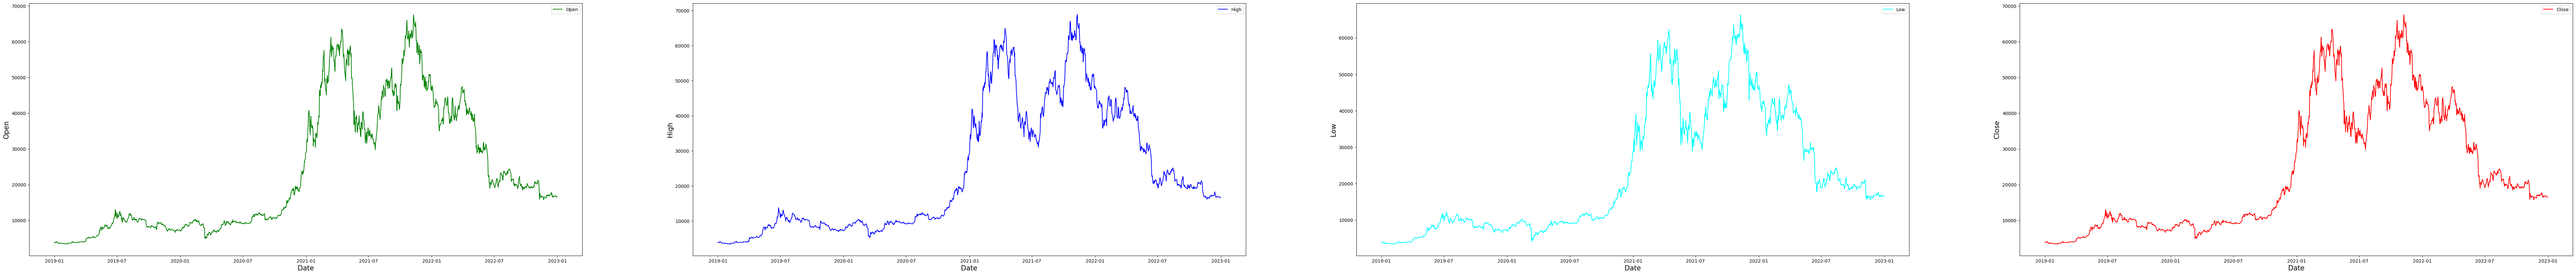

In [62]:
fig, ax = plt.subplots(1,4,figsize=(100,10))

ax[0].plot(crypto_data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Open',size=15)
ax[0].legend()

ax[1].plot(crypto_data['High'], label='High', color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('High',size=15)
ax[1].legend()

ax[2].plot(crypto_data['Low'], label='Low', color='cyan')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('Low',size=15)
ax[2].legend()

ax[3].plot(crypto_data['Close'], label='Close' ,color='red')
ax[3].set_xlabel('Date',size=15)
ax[3].set_ylabel('Close',size=15)
ax[3].legend()

fig.show()

# Data Pre-Processing

In [63]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0, 1))
crypto_data[crypto_data.columns] = MMS.fit_transform(crypto_data)

In [64]:
crypto_data.shape

(1461, 4)

In [65]:
#Pembagian data training dan data testing sebesar 90% dan 10% masing-masing
training_size = round(len(crypto_data) * 0.90)
training_size

1315

In [66]:
train_data = crypto_data[:training_size]
test_data  = crypto_data[training_size:]

train_data.shape, test_data.shape

((1315, 4), (146, 4))

In [67]:
test_data

,Open,High,Low,Close
Date,,,,
2022-08-08,0.308319,0.317858,0.314101,0.318075
2022-08-09,0.318170,0.313191,0.311012,0.308020
2022-08-10,0.308060,0.316691,0.307671,0.320228
2022-08-11,0.320304,0.327328,0.325602,0.320382
2022-08-12,0.320442,0.321054,0.321732,0.327321
...,...,...,...,...
2022-12-27,0.210729,0.207031,0.210364,0.207546
2022-12-28,0.207566,0.204098,0.208070,0.204981
2022-12-29,0.205008,0.202317,0.208246,0.206380


In [68]:
# Fungsi untuk membuat rangkaian data untuk training dan testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10, len(dataset)): # memilih 10 baris dalam waktu bersamaan
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [69]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [70]:
print(test_seq.shape, test_label.shape)

(136, 10, 4) (136, 4)


In [71]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1305, 10, 4), (1305, 4), (136, 10, 4), (136, 4))

In [72]:
train_seq.shape[1], train_seq.shape[2]

(10, 4)

# Creating LSTM model

In [73]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint

In [74]:
# Struktur jaringan LSTM
def LSTM_model():
  model = Sequential()
  model.add(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100, return_sequences=True,))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100))
  model.add(Dropout(0.2))

  model.add(Dense(4))

  return model

In [75]:
  model = LSTM_model()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 4

In [130]:
#Pilih epoch
epoch="50" # @param [25, 50, 75, 100]
epoch = int(epoch)

In [131]:
filepath = f'{crypto}_epoch_{epoch}_model'

In [132]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model.fit(train_seq, train_label, batch_size=32, epochs=epoch, validation_data=(test_seq, test_label), verbose=1, callbacks=callbacks)

Epoch 1/50
41/41 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0279
Epoch 1: val_loss improved from inf to 0.00018, saving model to BTC_epoch_50_model


41/41 [==============================] - 32s 800ms/step - loss: 0.0021 - mean_absolute_error: 0.0279 - val_loss: 1.7761e-04 - val_mean_absolute_error: 0.0086
Epoch 2/50
41/41 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_error: 0.0258
Epoch 2: val_loss did not improve from 0.00018
41/41 [==============================] - 2s 48ms/step - loss: 0.0018 - mean_absolute_error: 0.0258 - val_loss: 2.5850e-04 - val_mean_absolute_error: 0.0130
Epoch 3/50
41/41 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_error: 0.0258
Epoch 3: val_loss improved from 0.00018 to 0.00016, saving model to BTC_epoch_50_model


41/41 [==============================] - 14s 359ms/step - loss: 0.0018 - mean_absolute_error: 0.0258 - val_loss: 1.6021e-04 - val_mean_absolute_error: 0.0087
Epoch 4/50
41/41 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0239
Epoch 4: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 32ms/step - loss: 0.0015 - mean_absolute_error: 0.0239 - val_loss: 1.7266e-04 - val_mean_absolute_error: 0.0088
Epoch 5/50
41/41 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0239
Epoch 5: val_loss improved from 0.00016 to 0.00016, saving model to BTC_epoch_50_model


41/41 [==============================] - 14s 360ms/step - loss: 0.0015 - mean_absolute_error: 0.0239 - val_loss: 1.5750e-04 - val_mean_absolute_error: 0.0089
Epoch 6/50
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0255
Epoch 6: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 31ms/step - loss: 0.0017 - mean_absolute_error: 0.0255 - val_loss: 4.6454e-04 - val_mean_absolute_error: 0.0175
Epoch 7/50
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0255
Epoch 7: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 31ms/step - loss: 0.0017 - mean_absolute_error: 0.0255 - val_loss: 3.1656e-04 - val_mean_absolute_error: 0.0136
Epoch 8/50
41/41 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0241
Epoch 8: val_loss improved from 0.00016 to 0.00015, saving model to BTC_epoch_50_model


41/41 [==============================] - 17s 434ms/step - loss: 0.0015 - mean_absolute_error: 0.0241 - val_loss: 1.4979e-04 - val_mean_absolute_error: 0.0080
Epoch 9/50
40/41 [============================>.] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0233
Epoch 9: val_loss did not improve from 0.00015
41/41 [==============================] - 2s 45ms/step - loss: 0.0014 - mean_absolute_error: 0.0234 - val_loss: 4.0099e-04 - val_mean_absolute_error: 0.0163
Epoch 10/50
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0224
Epoch 10: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 31ms/step - loss: 0.0013 - mean_absolute_error: 0.0224 - val_loss: 1.5379e-04 - val_mean_absolute_error: 0.0082
Epoch 11/50
41/41 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0236
Epoch 11: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 32ms/step - loss: 0.0015 -

41/41 [==============================] - 15s 385ms/step - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 1.4230e-04 - val_mean_absolute_error: 0.0079
Epoch 18/50
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0234
Epoch 18: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 31ms/step - loss: 0.0013 - mean_absolute_error: 0.0234 - val_loss: 1.5267e-04 - val_mean_absolute_error: 0.0092
Epoch 19/50
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0223
Epoch 19: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 31ms/step - loss: 0.0013 - mean_absolute_error: 0.0223 - val_loss: 1.7027e-04 - val_mean_absolute_error: 0.0089
Epoch 20/50
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0222
Epoch 20: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 31ms/step - loss: 0.0013

41/41 [==============================] - 14s 358ms/step - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 1.2446e-04 - val_mean_absolute_error: 0.0074
Epoch 23/50
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0223
Epoch 23: val_loss did not improve from 0.00012
41/41 [==============================] - 2s 43ms/step - loss: 0.0013 - mean_absolute_error: 0.0223 - val_loss: 1.3303e-04 - val_mean_absolute_error: 0.0076
Epoch 24/50
40/41 [============================>.] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0212
Epoch 24: val_loss improved from 0.00012 to 0.00012, saving model to BTC_epoch_50_model


41/41 [==============================] - 15s 377ms/step - loss: 0.0011 - mean_absolute_error: 0.0212 - val_loss: 1.1589e-04 - val_mean_absolute_error: 0.0070
Epoch 25/50
41/41 [==============================] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0211
Epoch 25: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 31ms/step - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 2.9508e-04 - val_mean_absolute_error: 0.0136
Epoch 26/50
41/41 [==============================] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0220
Epoch 26: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 31ms/step - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 1.8232e-04 - val_mean_absolute_error: 0.0095
Epoch 27/50
41/41 [==============================] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0217
Epoch 27: val_loss improved from 0.00012 to 0.00011, saving model to BTC_epoch_50_model


41/41 [==============================] - 15s 368ms/step - loss: 0.0012 - mean_absolute_error: 0.0217 - val_loss: 1.1086e-04 - val_mean_absolute_error: 0.0070
Epoch 28/50
41/41 [==============================] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0218
Epoch 28: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 33ms/step - loss: 0.0012 - mean_absolute_error: 0.0218 - val_loss: 1.5112e-04 - val_mean_absolute_error: 0.0086
Epoch 29/50
41/41 [==============================] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0219
Epoch 29: val_loss improved from 0.00011 to 0.00011, saving model to BTC_epoch_50_model


41/41 [==============================] - 14s 347ms/step - loss: 0.0012 - mean_absolute_error: 0.0219 - val_loss: 1.0977e-04 - val_mean_absolute_error: 0.0069
Epoch 30/50
41/41 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0206    
Epoch 30: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 32ms/step - loss: 0.0010 - mean_absolute_error: 0.0206 - val_loss: 1.8262e-04 - val_mean_absolute_error: 0.0099
Epoch 31/50
40/41 [============================>.] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0207
Epoch 31: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 50ms/step - loss: 0.0010 - mean_absolute_error: 0.0208 - val_loss: 1.1869e-04 - val_mean_absolute_error: 0.0076
Epoch 32/50
40/41 [============================>.] - ETA: 0s - loss: 9.4149e-04 - mean_absolute_error: 0.0200
Epoch 32: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 42ms/step - loss

41/41 [==============================] - 15s 383ms/step - loss: 0.0011 - mean_absolute_error: 0.0210 - val_loss: 1.0875e-04 - val_mean_absolute_error: 0.0072
Epoch 35/50
41/41 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0211
Epoch 35: val_loss improved from 0.00011 to 0.00011, saving model to BTC_epoch_50_model


41/41 [==============================] - 15s 367ms/step - loss: 0.0010 - mean_absolute_error: 0.0211 - val_loss: 1.0649e-04 - val_mean_absolute_error: 0.0068
Epoch 36/50
41/41 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0208    
Epoch 36: val_loss improved from 0.00011 to 0.00011, saving model to BTC_epoch_50_model


41/41 [==============================] - 14s 348ms/step - loss: 0.0010 - mean_absolute_error: 0.0208 - val_loss: 1.0537e-04 - val_mean_absolute_error: 0.0069
Epoch 37/50
41/41 [==============================] - ETA: 0s - loss: 9.2071e-04 - mean_absolute_error: 0.0201
Epoch 37: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 31ms/step - loss: 9.2071e-04 - mean_absolute_error: 0.0201 - val_loss: 1.1024e-04 - val_mean_absolute_error: 0.0075
Epoch 38/50
41/41 [==============================] - ETA: 0s - loss: 8.9694e-04 - mean_absolute_error: 0.0198
Epoch 38: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 47ms/step - loss: 8.9694e-04 - mean_absolute_error: 0.0198 - val_loss: 1.0904e-04 - val_mean_absolute_error: 0.0069
Epoch 39/50
41/41 [==============================] - ETA: 0s - loss: 9.3338e-04 - mean_absolute_error: 0.0201
Epoch 39: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 44ms

41/41 [==============================] - 15s 380ms/step - loss: 8.8624e-04 - mean_absolute_error: 0.0195 - val_loss: 9.8639e-05 - val_mean_absolute_error: 0.0066
Epoch 44/50
41/41 [==============================] - ETA: 0s - loss: 8.5475e-04 - mean_absolute_error: 0.0194
Epoch 44: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 33ms/step - loss: 8.5475e-04 - mean_absolute_error: 0.0194 - val_loss: 9.8840e-05 - val_mean_absolute_error: 0.0067
Epoch 45/50
41/41 [==============================] - ETA: 0s - loss: 9.1962e-04 - mean_absolute_error: 0.0199
Epoch 45: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 32ms/step - loss: 9.1962e-04 - mean_absolute_error: 0.0199 - val_loss: 1.1492e-04 - val_mean_absolute_error: 0.0070
Epoch 46/50
41/41 [==============================] - ETA: 0s - loss: 9.2785e-04 - mean_absolute_error: 0.0201
Epoch 46: val_loss did not improve from 0.00010
41/41 [==============================] - 2s 

41/41 [==============================] - 15s 365ms/step - loss: 9.0301e-04 - mean_absolute_error: 0.0201 - val_loss: 9.1188e-05 - val_mean_absolute_error: 0.0065


In [82]:
# model = load_model(f"{crypto}_model")

In [133]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 0s 9ms/step


array([[0.3157776 , 0.32166147, 0.31047714, 0.3175724 ],
       [0.3101744 , 0.31605226, 0.3047846 , 0.3118959 ],
       [0.29476568, 0.300484  , 0.28897232, 0.29618812],
       [0.27951086, 0.28513163, 0.27351874, 0.28072226],
       [0.2738843 , 0.2795707 , 0.26820785, 0.27517095]], dtype=float32)

In [134]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[23657.994, 24452.283, 22948.297, 23777.254],
       [23298.559, 24085.656, 22589.719, 23413.008],
       [22310.115, 23068.088, 21593.688, 22405.08 ],
       [21331.543, 22064.633, 20620.25 , 21412.678],
       [20970.607, 21701.16 , 20285.71 , 21056.465]], dtype=float32)

In [135]:
test_inverse_predicted.shape

(136, 4)

In [136]:
test_inverse_predicted_shape_negative = -test_inverse_predicted.shape[0]

In [137]:
print(test_inverse_predicted_shape_negative)

-136


In [138]:
test_inverse = MMS.inverse_transform(test_label)

In [139]:
test_inverse[:5]

array([[23341.04, 23563.83, 23177.6 , 23212.74],
       [23213.31, 23213.31, 20868.85, 20877.55],
       [20872.84, 21350.81, 20856.73, 21166.06],
       [21160.39, 21668.85, 21103.2 , 21534.12],
       [21531.46, 21531.46, 20939.18, 21398.91]])

In [140]:
rmse = np.sqrt(np.mean(((test_inverse_predicted - test_inverse)**2)))
rmse

611.6225532700403

# Visualizing predicted and actual data

In [141]:
# Merging actual and predicted data for better visualization
new_data = pd.concat([df.iloc[test_inverse_predicted_shape_negative:].copy(), pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'high_predicted', 'low_predicted','close_predicted'], index=df.iloc[test_inverse_predicted_shape_negative:].index)], axis=1)

In [142]:
new_data.tail()

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-12-27,0.210729,0.207031,0.210364,0.207546,16869.105469,17399.019531,16414.431641,16950.320312
2022-12-28,0.207566,0.204098,0.208070,0.204981,16838.730469,17367.343750,16382.370117,16918.802734
2022-12-29,0.205008,0.202317,0.208246,0.206380,16723.830078,17248.236328,16265.070312,16800.875000
2022-12-30,0.206396,0.202190,0.206656,0.205761,16623.853516,17145.865234,16166.141602,16699.367188
2022-12-31,0.205809,0.201969,0.208387,0.204902,16565.660156,17086.505859,16110.174805,16640.890625


In [143]:
new_data[['Open','High','Low','Close']] = MMS.inverse_transform(new_data[['Open','High','Low','Close']])

In [144]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,23341.04,23563.83,23177.60,23212.74,23657.994141,24452.283203,22948.296875,23777.253906
2022-08-19,23213.31,23213.31,20868.85,20877.55,23298.558594,24085.656250,22589.718750,23413.007812
2022-08-20,20872.84,21350.81,20856.73,21166.06,22310.115234,23068.087891,21593.687500,22405.080078
2022-08-21,21160.39,21668.85,21103.20,21534.12,21331.542969,22064.632812,20620.250000,21412.677734
2022-08-22,21531.46,21531.46,20939.18,21398.91,20970.607422,21701.160156,20285.710938,21056.464844
...,...,...,...,...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17,16869.105469,17399.019531,16414.431641,16950.320312
2022-12-28,16716.40,16768.17,16497.56,16552.57,16838.730469,17367.343750,16382.370117,16918.802734
2022-12-29,16552.32,16651.76,16508.68,16642.34,16723.830078,17248.236328,16265.070312,16800.875000


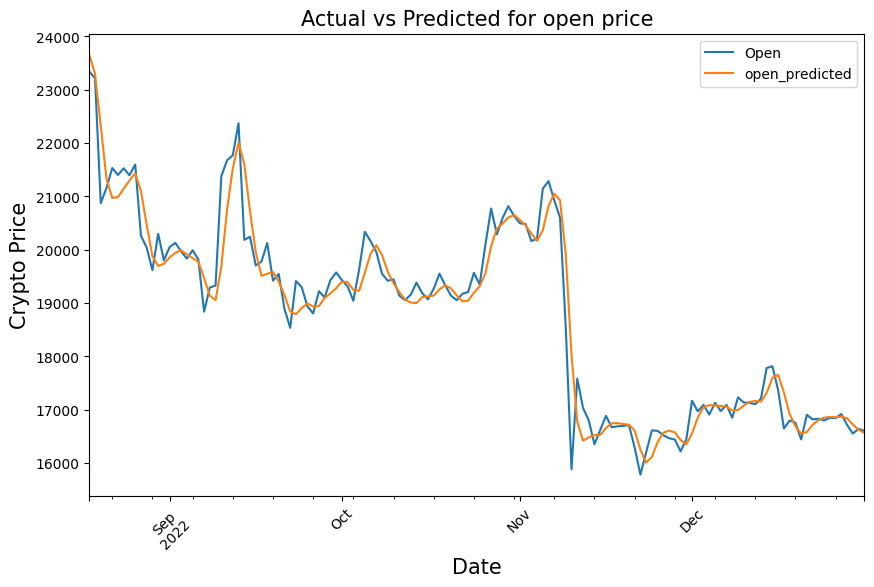

In [145]:
new_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

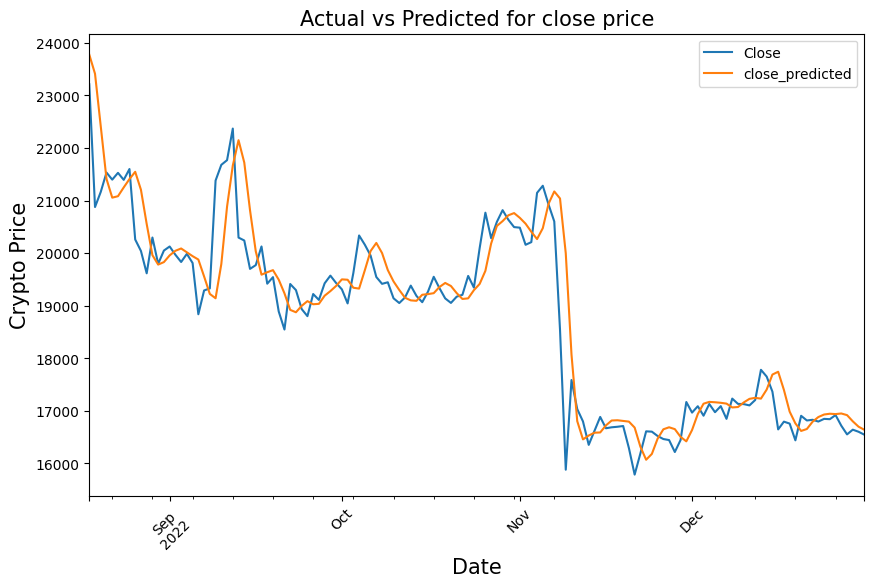

In [146]:
new_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

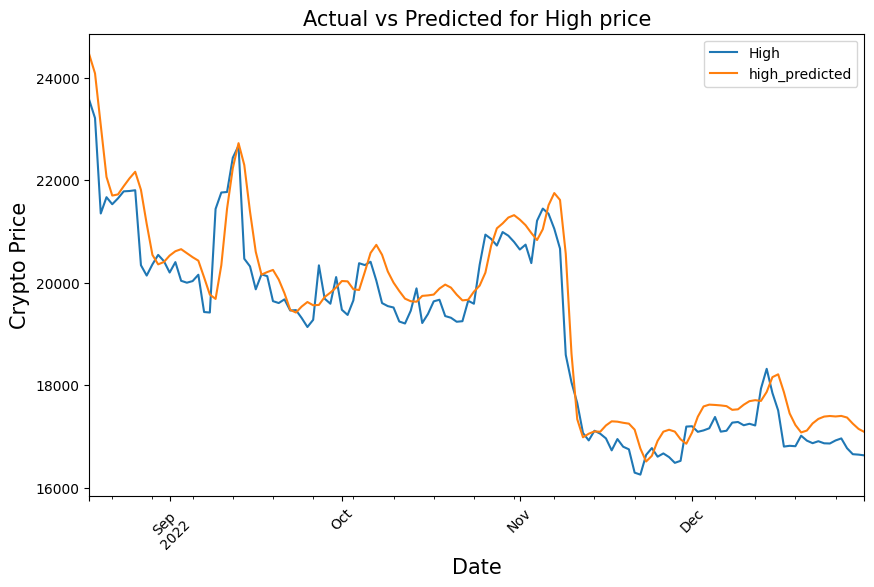

In [147]:
new_data[['High','high_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for High price',size=15)
plt.show()

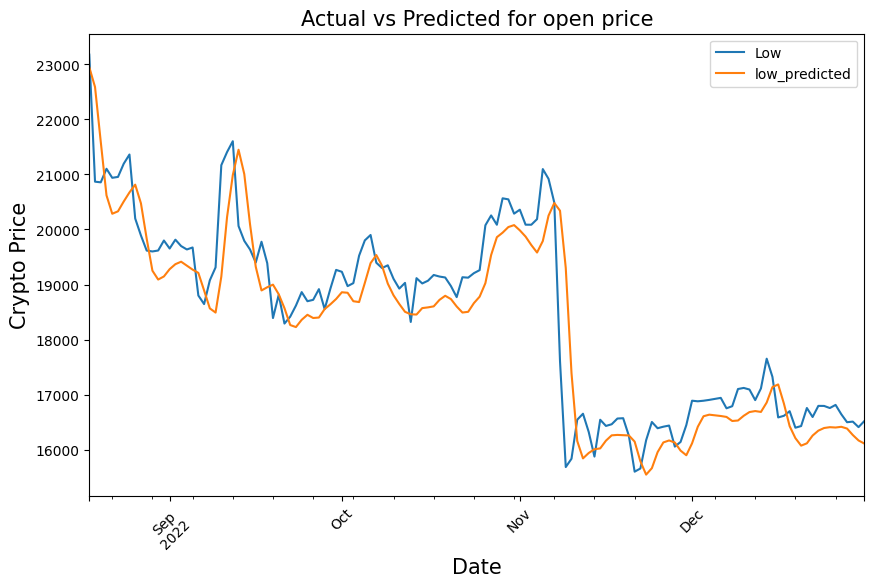

In [148]:
new_data[['Low', 'low_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

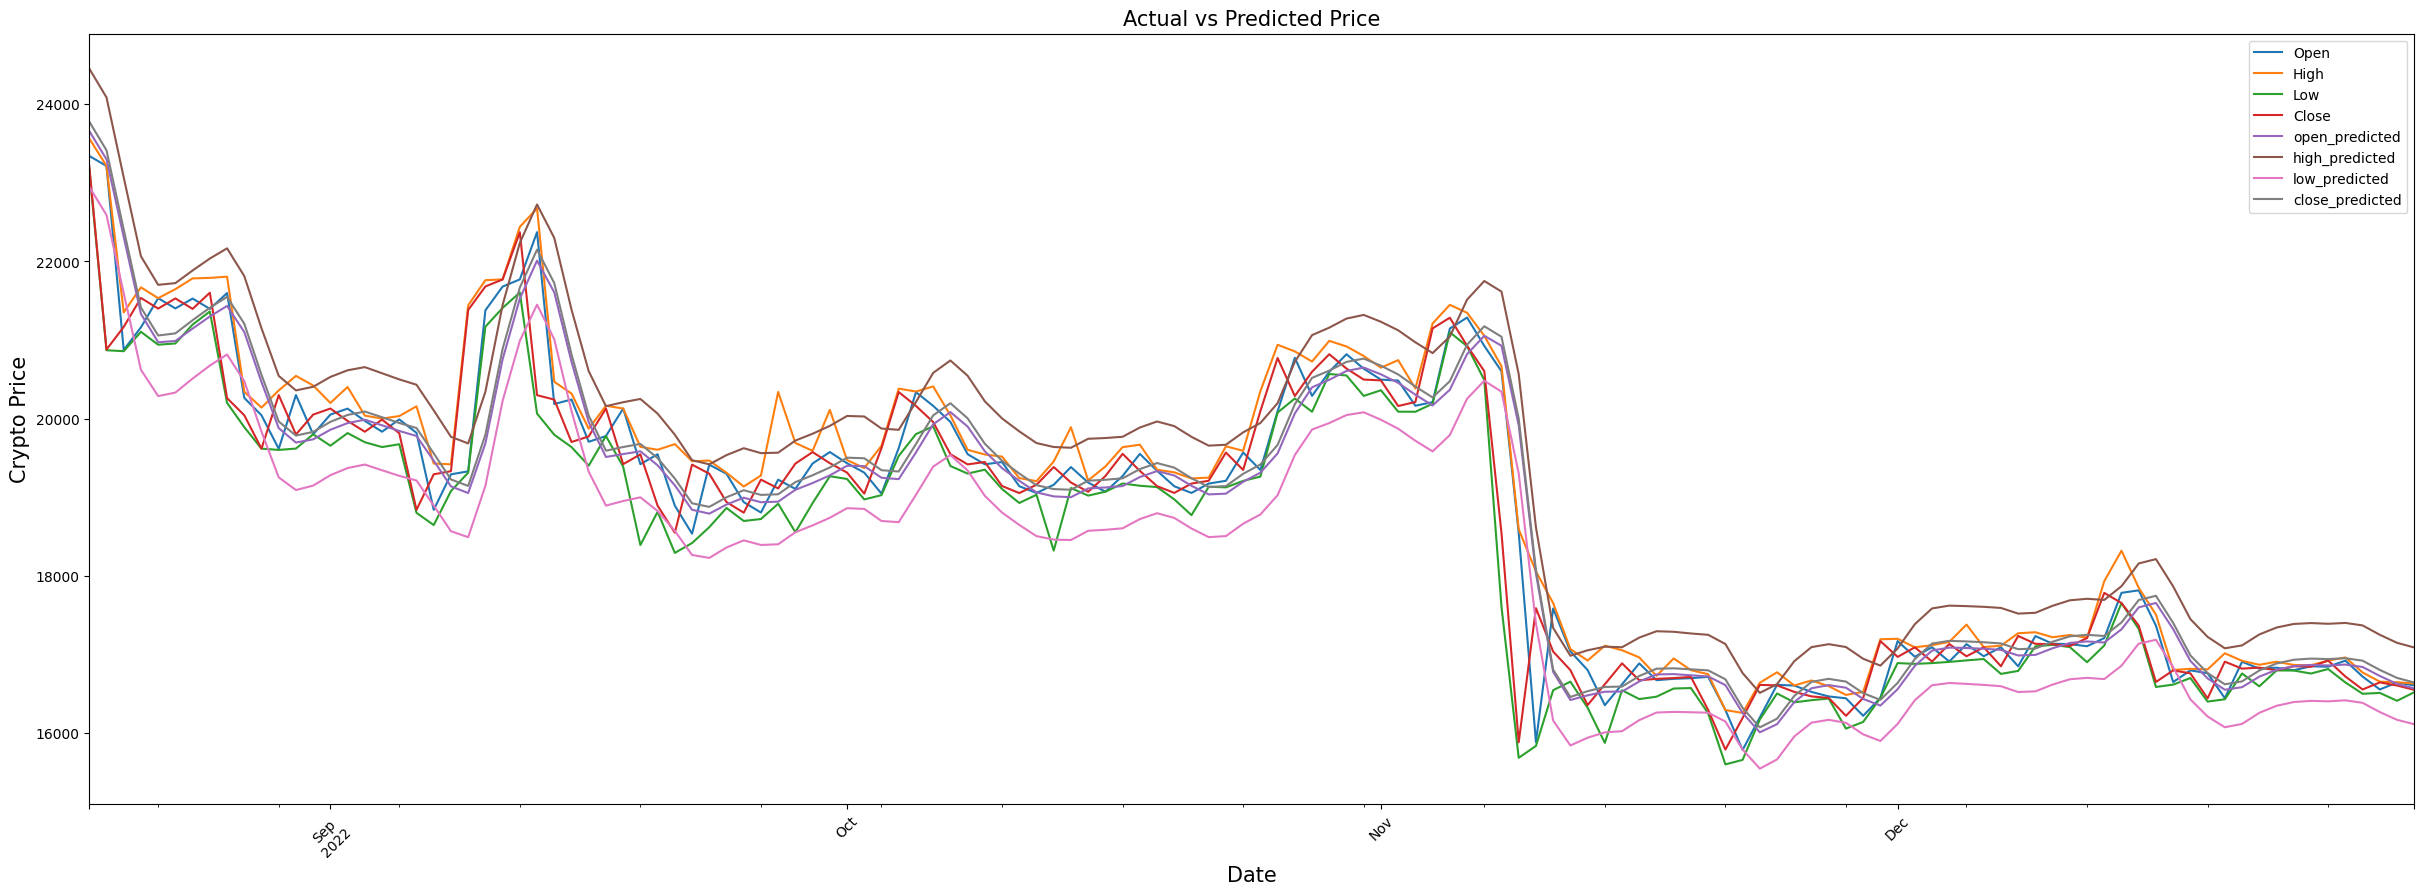

In [149]:
new_data[:].plot(figsize=(30,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted Price',size=15)
plt.show()

In [150]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,23341.04,23563.83,23177.60,23212.74,23657.994141,24452.283203,22948.296875,23777.253906
2022-08-19,23213.31,23213.31,20868.85,20877.55,23298.558594,24085.656250,22589.718750,23413.007812
2022-08-20,20872.84,21350.81,20856.73,21166.06,22310.115234,23068.087891,21593.687500,22405.080078
2022-08-21,21160.39,21668.85,21103.20,21534.12,21331.542969,22064.632812,20620.250000,21412.677734
2022-08-22,21531.46,21531.46,20939.18,21398.91,20970.607422,21701.160156,20285.710938,21056.464844
...,...,...,...,...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17,16869.105469,17399.019531,16414.431641,16950.320312
2022-12-28,16716.40,16768.17,16497.56,16552.57,16838.730469,17367.343750,16382.370117,16918.802734
2022-12-29,16552.32,16651.76,16508.68,16642.34,16723.830078,17248.236328,16265.070312,16800.875000


# Predicting upcoming Days



In [151]:
start_predict = new_data.index[-1]
end_predict = pd.to_datetime("today")
period = (start_predict - end_predict).days - 1
period

-244

In [152]:
# Creating a dataframe and adding N days to existing index

new_rows = pd.DataFrame(index=pd.date_range(start=start_predict,  end=end_predict, freq='D', inclusive='right'), columns=new_data.columns[:4])
new_pred_data = pd.concat([new_data.drop(columns=['open_predicted','high_predicted', 'low_predicted', 'close_predicted'], axis= 0), new_rows], axis=0)

In [153]:
new_rows

,Open,High,Low,Close
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-08-26,NaN,NaN,NaN,NaN
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN


In [154]:
#Get Latest Price

latest_date_start = start_predict.strftime("%d-%m-%Y")

latest_date_end = end_predict.strftime("%d-%m-%Y")

latest_scraper = CmcScraper(crypto, latest_date_start, latest_date_end)
latest_price =  latest_scraper.get_dataframe()

In [155]:
latest_price['Open'] = latest_price['Open'].apply(lambda x:round(x,2))
latest_price['High'] = latest_price['High'].apply(lambda x:round(x,2))
latest_price['Low'] = latest_price['Low'].apply(lambda x:round(x,2))
latest_price['Close'] = latest_price['Close'].apply(lambda x:round(x,2))

In [156]:
latest_price = latest_price[::-1]
latest_price = latest_price.reset_index()

In [157]:
latest_price = latest_price[['Date','Open','High','Low','Close']] # Extracting required columns
latest_price['Date'] = pd.to_datetime(latest_price['Date'])
latest_price.set_index('Date', drop=True, inplace=True) # Setting date column as index

In [158]:
latest_price

,Open,High,Low,Close
Date,,,,
2022-12-31,16603.67,16628.99,16517.52,16547.50
2023-01-01,16547.91,16630.44,16521.23,16625.08
2023-01-02,16625.51,16759.34,16572.23,16688.47
2023-01-03,16688.85,16760.45,16622.37,16679.86
2023-01-04,16680.20,16964.59,16667.76,16863.24
...,...,...,...,...
2023-08-25,26163.68,26248.10,25786.81,26047.67
2023-08-26,26047.24,26107.38,25983.88,26008.46
2023-08-27,26008.24,26165.37,25965.10,26089.69


In [159]:
new_pred_data

,Open,High,Low,Close
2022-08-18,23341.04,23563.83,23177.60,23212.74
2022-08-19,23213.31,23213.31,20868.85,20877.55
2022-08-20,20872.84,21350.81,20856.73,21166.06
2022-08-21,21160.39,21668.85,21103.20,21534.12
2022-08-22,21531.46,21531.46,20939.18,21398.91
...,...,...,...,...
2023-08-26,NaN,NaN,NaN,NaN
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN


In [160]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close'], index=new_pred_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [161]:
test_seq[-1:]

array([[[0.21049876, 0.20637245, 0.21217129, 0.20911036],
        [0.20915578, 0.20560549, 0.20957568, 0.20931   ],
        [0.20933131, 0.20619528, 0.21278328, 0.20878964],
        [0.20882217, 0.20557535, 0.21276851, 0.20958148],
        [0.20960988, 0.20551185, 0.21216081, 0.20949155],
        [0.20952788, 0.20642324, 0.2130676 , 0.21070432],
        [0.21072885, 0.20703109, 0.21036405, 0.20754633],
        [0.20756602, 0.20409849, 0.20806991, 0.20498116],
        [0.2050082 , 0.20231747, 0.20824644, 0.20638016],
        [0.20639577, 0.20219003, 0.20665574, 0.20576069]]])

In [162]:
currenct_seq = test_seq[-1:]

for i in range(period, 0):
  up_pred = model.predict(currenct_seq)
  upcoming_prediction.iloc[i] = up_pred
  currenct_seq = np.append(currenct_seq[0][1:],up_pred,axis=0)
  currenct_seq = currenct_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [163]:
upcoming_prediction[['Open','High','Low','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','High','Low','Close']])

In [164]:
upcoming_prediction[start_predict:end_predict]

,Open,High,Low,Close
2022-12-31,16546.621391,17067.700631,16093.621811,16622.367497
2023-01-01,16545.229623,17066.881527,16093.768239,16621.340572
2023-01-02,16550.345519,17072.249048,16098.775882,16626.350894
2023-01-03,16559.343265,17081.494897,16106.684859,16635.093139
2023-01-04,16570.302488,17092.769515,16116.232702,16645.829952
...,...,...,...,...
2023-08-26,17587.377566,18153.138769,17089.893926,17670.111722
2023-08-27,17587.688229,18153.463099,17090.193352,17670.423433
2023-08-28,17587.995068,18153.782560,17090.487146,17670.731319
2023-08-29,17588.295216,18154.095203,17090.776247,17671.034425


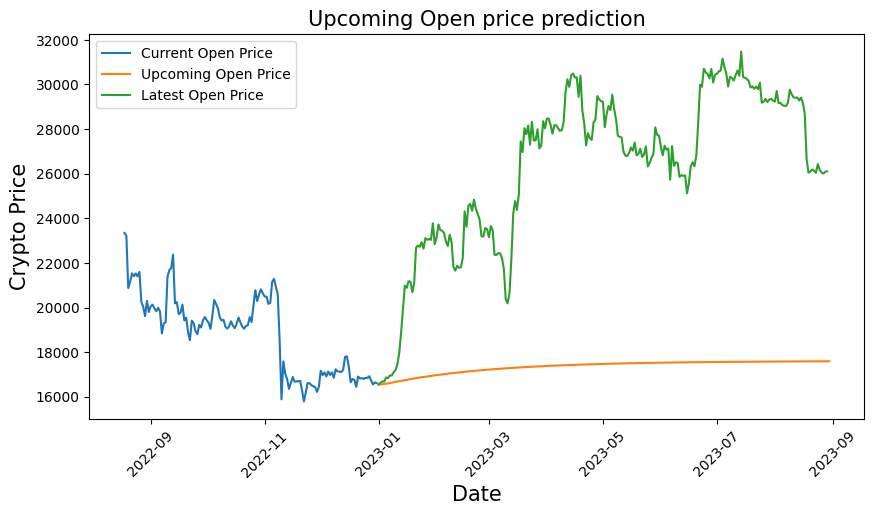

In [165]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Open'],label='Upcoming Open Price')
ax.plot(latest_price.loc['2023-01-01':,'Open'],label='Latest Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

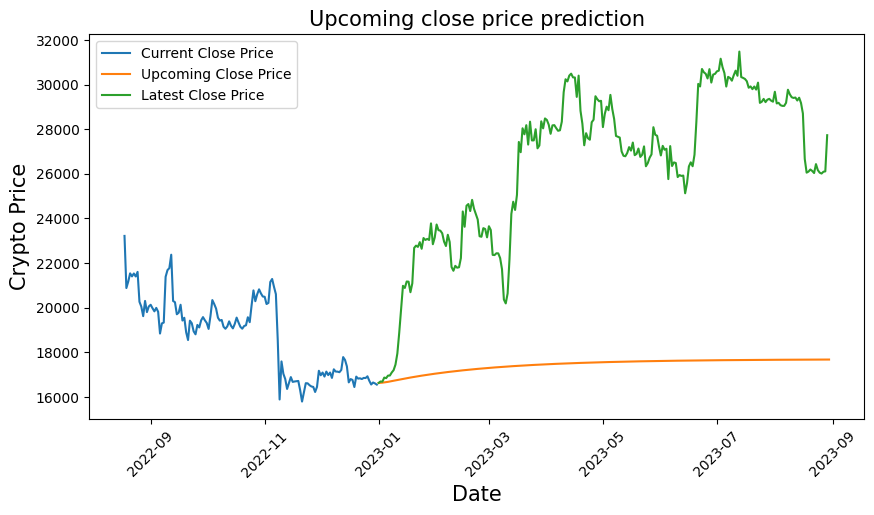

In [166]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Close'],label='Upcoming Close Price')
ax.plot(latest_price.loc['2023-01-01':,'Close'],label='Latest Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

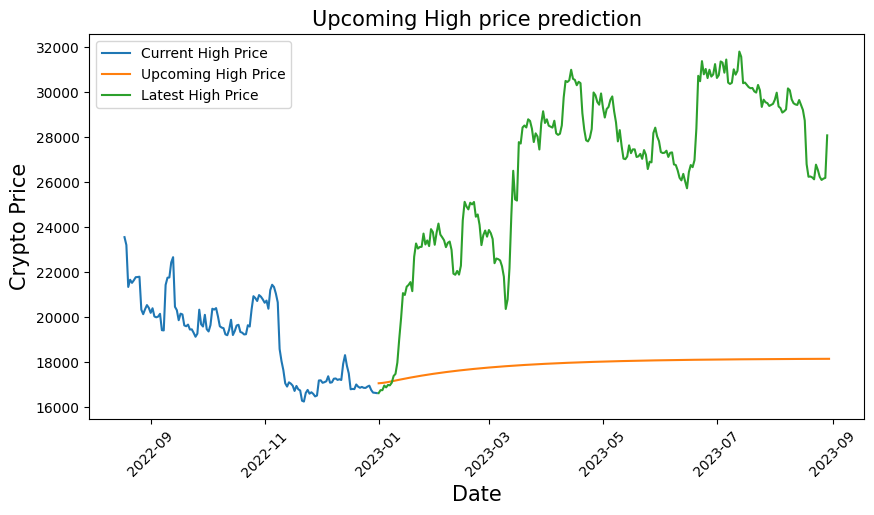

In [167]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'High'],label='Current High Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'High'],label='Upcoming High Price')
ax.plot(latest_price.loc['2023-01-01':,'High'],label='Latest High Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming High price prediction',size=15)
ax.legend()
fig.show()

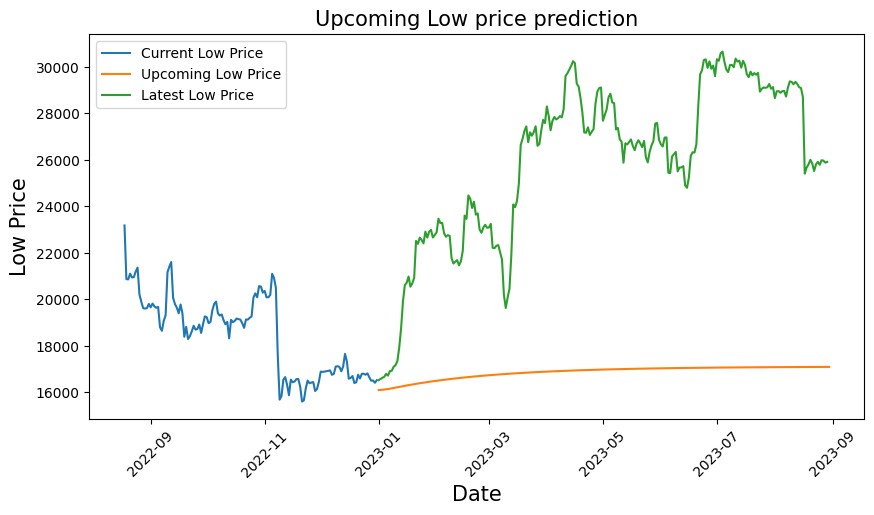

In [168]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Low'],label='Current Low Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Low'],label='Upcoming Low Price')
ax.plot(latest_price.loc['2023-01-01':,'Low'],label='Latest Low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Low Price',size=15)
ax.set_title('Upcoming Low price prediction',size=15)
ax.legend()
fig.show()

In [169]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

In [170]:
folder_to_compress = f'/content/{crypto}_epoch_{epoch}_model'
output_zip_path = f'/content/{crypto}_epoch_{epoch}_model.zip'

zip_folder(folder_to_compress, output_zip_path)
print(f'Folder "{folder_to_compress}" compressed to "{output_zip_path}"')

Folder "/content/BTC_epoch_50_model" compressed to "/content/BTC_epoch_50_model.zip"


In [171]:
# !zip -r /content/BTC_epoch_25_model.zip /content/BTC_model

In [172]:
#!zip -r /content/ETH_model.zip /content/ETH_model

In [173]:
#!zip -r /content/USDT_model.zip /content/USDT_model

In [174]:
# !zip -r /content/USDC_model.zip /content/USDC_model

In [175]:
# !zip -r /content/BNB_model.zip /content/BNB_model